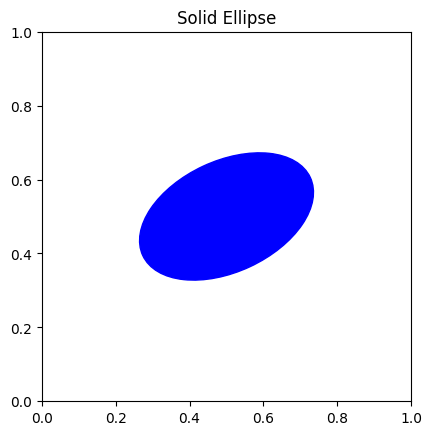

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create figure and axes
fig, ax = plt.subplots()

# Create a solid ellipse
# Parameters: (center_x, center_y), width, height, angle
ellipse = patches.Ellipse((0.5, 0.5), 0.5, 0.3, 
                          angle=25, fill=True, color='blue')

# Add the ellipse to the plot
ax.add_patch(ellipse)

# Set limits and aspect ratio
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')

# Add title
plt.title('Solid Ellipse')

# Display the plot
plt.show()


Ellipse parameters: Center=(1.00, 2.00), Axes=(5.99, 10.02), Angle=135.33 degrees


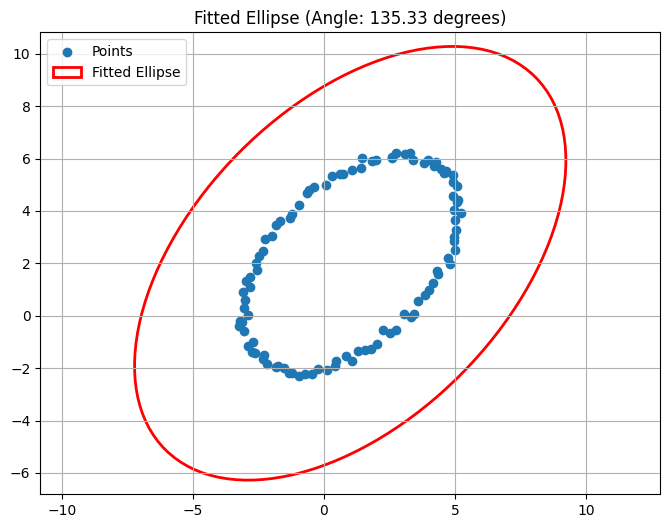

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Generate sample points on an ellipse (or use your own data points)
t = np.linspace(0, 2*np.pi, 100)
a, b = 5, 3  # semi-major and semi-minor axes
true_angle = np.pi/4  # 30 degrees in radians
x0, y0 = 1, 2  # center of the ellipse

# Parametric equations of a rotated ellipse
x = x0 + a*np.cos(t)*np.cos(true_angle) - b*np.sin(t)*np.sin(true_angle)
y = y0 + a*np.cos(t)*np.sin(true_angle) + b*np.sin(t)*np.cos(true_angle)

# Add some noise to simulate real data
x += np.random.normal(0, 0.1, len(t))
y += np.random.normal(0, 0.1, len(t))

# Convert points to the format expected by OpenCV
points = np.column_stack((x, y)).astype(np.float32)

# Fit ellipse using OpenCV
ellipse = cv2.fitEllipse(points)

# Extract ellipse parameters
center, axes, angle = ellipse
print(f"Ellipse parameters: Center=({center[0]:.2f}, {center[1]:.2f}), "
      f"Axes=({axes[0]:.2f}, {axes[1]:.2f}), Angle={angle:.2f} degrees")

# Visualize the result
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Points')

# Create a matplotlib ellipse patch with the fitted parameters
ellipse_patch = Ellipse(xy=center, width=2*axes[0], height=2*axes[1], 
                       angle=angle, edgecolor='red', facecolor='none', 
                       linewidth=2, label='Fitted Ellipse')
ax = plt.gca()
ax.add_patch(ellipse_patch)

plt.axis('equal')
plt.grid(True)
plt.legend()
plt.title(f'Fitted Ellipse (Angle: {angle:.2f} degrees)')
plt.show()


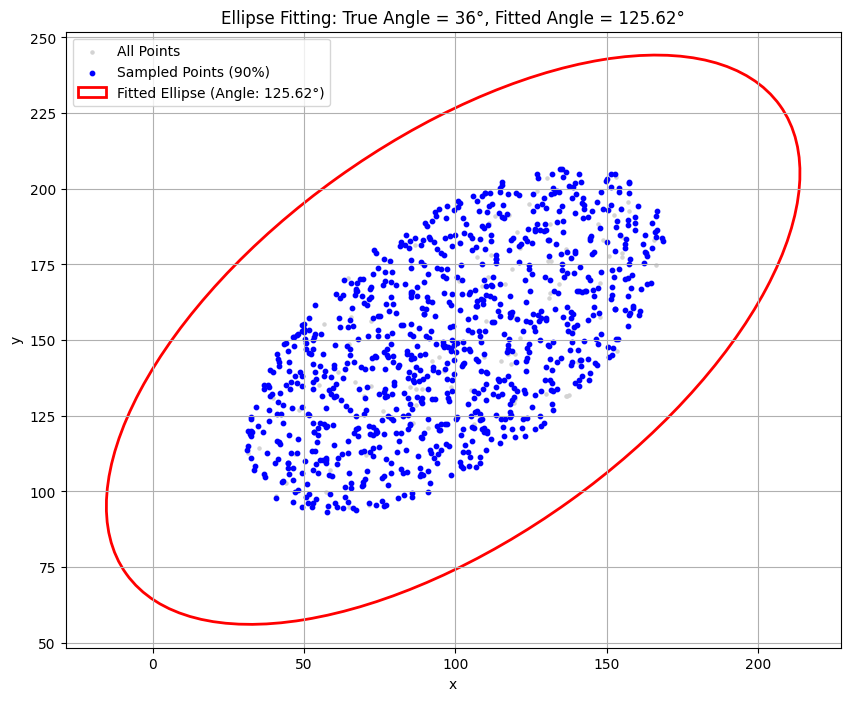

Original ellipse parameters: Center=(100, 150), Axes=(80, 40), Angle=36°
Fitted ellipse parameters: Center=(99.29988861083984, 150.13912963867188), Axes=(65.75916290283203, 132.83375549316406), Angle=125.62075805664062°


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import cv2

# Generate points within a solid ellipse
def generate_solid_ellipse(num_points, center, a, b, angle_deg):
    """
    Generate points within a solid ellipse.
    
    Parameters:
    num_points (int): Number of points to generate
    center (tuple): (x, y) coordinates of ellipse center
    a (float): Semi-major axis
    b (float): Semi-minor axis
    angle_deg (float): Rotation angle in degrees
    """
    points = []
    angle_rad = np.deg2rad(angle_deg)
    
    while len(points) < num_points:
        # Generate points in a rectangle that bounds the ellipse
        x = np.random.uniform(-a, a)
        y = np.random.uniform(-b, b)
        
        # Check if point is inside the ellipse
        if (x**2 / a**2 + y**2 / b**2) <= 1:
            # Rotate the point
            x_rot = x * np.cos(angle_rad) - y * np.sin(angle_rad)
            y_rot = x * np.sin(angle_rad) + y * np.cos(angle_rad)
            
            # Translate to center
            x_centered = x_rot + center[0]
            y_centered = y_rot + center[1]
            
            points.append((x_centered, y_centered))
    
    return np.array(points)

# Sample 90% of the points
def sample_points(points, percentage=90):
    """Sample a percentage of points from the input array."""
    num_sampled = int(len(points) * percentage / 100)
    indices = np.random.choice(len(points), num_sampled, replace=False)
    return points[indices]

# Fit an ellipse to points using OpenCV
def fit_ellipse_opencv(points):
    """Fit an ellipse to points and return its parameters."""
    points = points.astype(np.float32)
    
    # OpenCV's fitEllipse requires at least 5 points
    if len(points) < 5:
        raise ValueError("At least 5 points are required for ellipse fitting")
    
    # Fit ellipse using OpenCV
    (center, axes, angle) = cv2.fitEllipse(points)
    
    return (center, axes, angle)

# Main function
def main():
    # Parameters for the original ellipse
    num_points = 1000
    center = (100, 150)
    a = 80  # Semi-major axis
    b = 40  # Semi-minor axis
    true_angle = 36  # Rotation angle in degrees
    
    # Generate points within the ellipse
    points = generate_solid_ellipse(num_points, center, a, b, true_angle)
    
    # Sample 90% of the points
    sampled_points = sample_points(points, 90)
    
    # Fit ellipse to the sampled points
    fitted_center, fitted_axes, fitted_angle = fit_ellipse_opencv(sampled_points)
    
    # Plot the results
    plt.figure(figsize=(10, 8))
    
    # Plot all points
    plt.scatter(points[:, 0], points[:, 1], c='lightgray', s=5, label='All Points')
    
    # Plot sampled points
    plt.scatter(sampled_points[:, 0], sampled_points[:, 1], c='blue', s=10, label='Sampled Points (90%)')
    
    # Plot the fitted ellipse
    ellipse = Ellipse(xy=fitted_center, width=2*fitted_axes[0], height=2*fitted_axes[1], 
                      angle=fitted_angle, edgecolor='red', facecolor='none', linewidth=2, 
                      label=f'Fitted Ellipse (Angle: {fitted_angle:.2f}°)')
    plt.gca().add_patch(ellipse)
    
    plt.axis('equal')
    plt.grid(True)
    plt.legend()
    plt.title(f'Ellipse Fitting: True Angle = {true_angle}°, Fitted Angle = {fitted_angle:.2f}°')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()
    
    print(f"Original ellipse parameters: Center={center}, Axes=({a}, {b}), Angle={true_angle}°")
    print(f"Fitted ellipse parameters: Center={fitted_center}, Axes={fitted_axes}, Angle={fitted_angle}°")

if __name__ == "__main__":
    main()
